In [1]:
import numpy as np

In [2]:
# create matrix for differentiation 
#n = 10
#x = np.zeros((n,1))
mean = 0
std = 1 
num_samples = 100
samples = np.random.normal(mean, std, size=num_samples)
r       = 0.9
x       = np.zeros((num_samples,))
for i in range(num_samples-1):
    x[i+1] = r*x[i]+(1-r**2)**0.5*samples[i]

#x        = [1,2,3]
x_record = np.zeros((1000,np.size(x)))
F        = np.eye(np.size(x))*10

for t in range(1000):
    x_n2  = np.roll(x,2)
    x_n1  = np.roll(x,1)
    x_p1  = np.roll(x,-1)
    
    dxdt  = -np.matmul(np.diag(x_n2),np.diag(x_n1))+np.matmul(np.diag(x_n1),np.diag(x_p1))-np.diag(x)+F
    x     = (np.diag(x)+dxdt*0.01).diagonal()
    x_record[t,:] = x


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

In [64]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(8.5, 3), dpi=300)
cs=plt.contourf(x_record.T,np.arange(-12,12.1,0.1),cmap='seismic',extend='both')
plt.xlabel('simulation time')
plt.ylabel('location')
plt.colorbar(cs)
fig.savefig('/content/gdrive/MyDrive/website-hugo/chaos_and_predictability/week4/LR96.png', dpi=300, bbox_inches='tight')
plt.close(fig) 

In [ ]:
# ensemble simulation 

# create matrix for differentiation 
#n = 10
#x = np.zeros((n,1))


x_init    = x_record[300,:]
#x        = [1,2,3]
x_record_ens = np.zeros((250,1000,np.size(x_init)))
F            = np.eye(np.size(x_init))*8

for ens in range(250):
    print("working on ens="+str(ens))
    std     = 0.01
    samples = np.random.normal(mean, std, size=num_samples)
    x       = x_init+samples
    for t in range(1000):
        x_n2  = np.roll(x,2)
        x_n1  = np.roll(x,1)
        x_p1  = np.roll(x,-1)
    
        dxdt  = -np.matmul(np.diag(x_n2),np.diag(x_n1))+np.matmul(np.diag(x_n1),np.diag(x_p1))-np.diag(x)+F
        x     = (np.diag(x)+dxdt*0.01).diagonal()
        x_record_ens[ens,t,:] = x

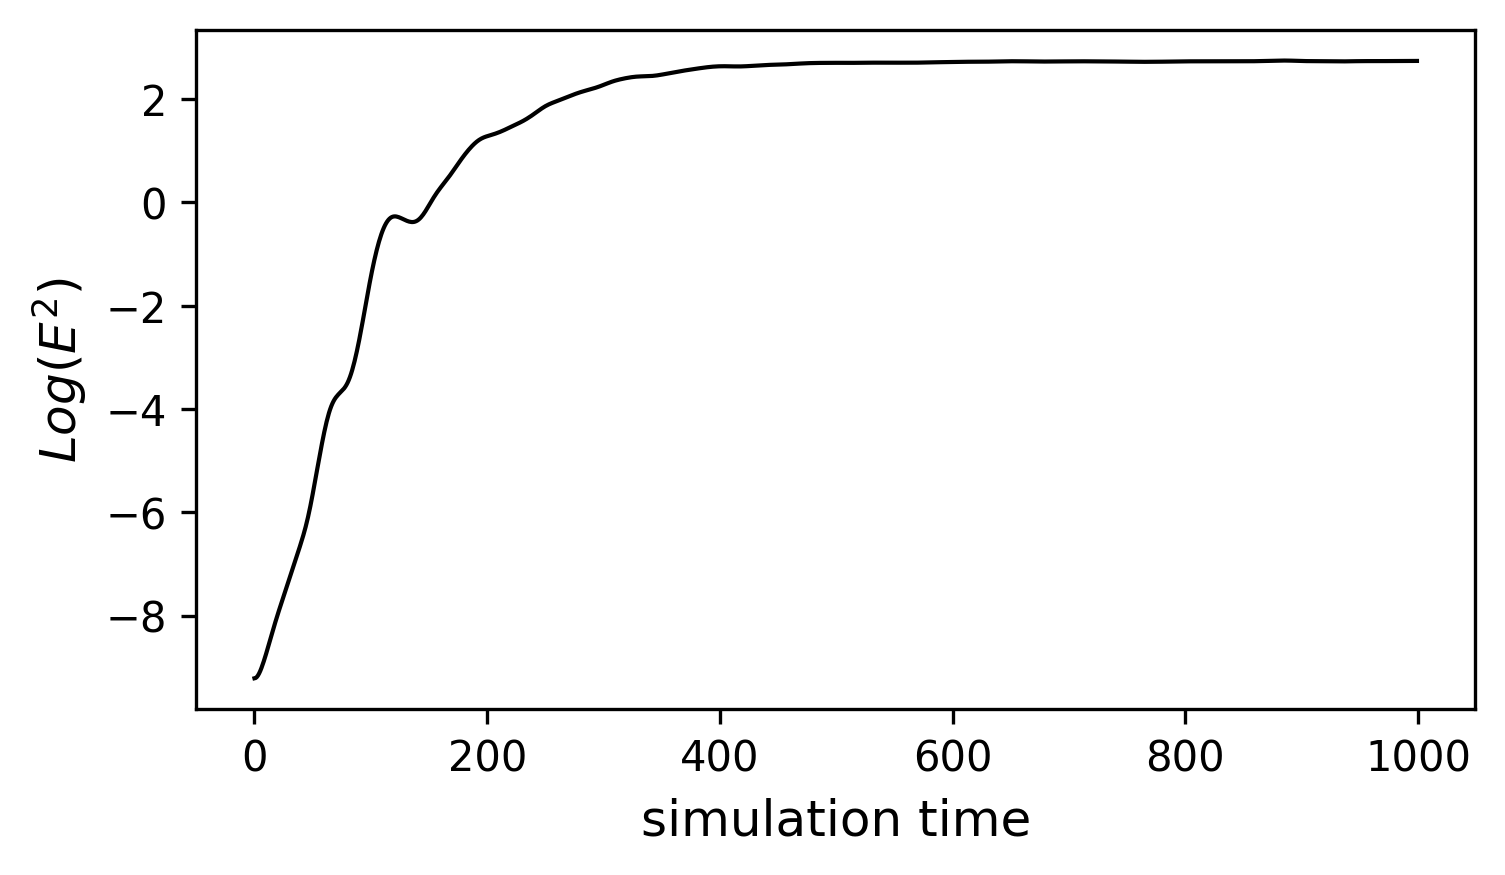

In [90]:
fig= plt.figure(figsize=(5.5, 3), dpi=300)
plt.plot(np.log(np.var(x_record_ens,axis=0).mean(axis=1)),color='k',linewidth=1)
plt.xlabel('simulation time',fontsize=12)
plt.ylabel(r'$Log (E^2)$',fontsize=12)
fig.savefig('/content/gdrive/MyDrive/website-hugo/chaos_and_predictability/week4/LR96_error.png', dpi=300, bbox_inches='tight')

In [ ]:
E = np.log(np.var(x_record_ens,axis=0).mean(axis=1))
plt.plot(E-E[0])

np.log(2)
(E-E[0])>np.log(2)

In [7]:
# model for multi-scale interaction


# create matrix for differentiation 
#n = 10
#x = np.zeros((n,1))
mean = 0
std  = 1 
num_samples = 100
samples = np.random.normal(mean, std, size=num_samples)
r       = 0.9
x       = np.zeros((num_samples,))
y       = np.zeros((num_samples*10,))
for i in range(num_samples-1):
    x[i+1] = r*x[i]+(1-r**2)**0.5*samples[i]

mean = 0
std  = 0.2
num_samples = 1000
samples = np.random.normal(mean, std, size=num_samples)
r       = 0.9
for i in range(num_samples-1):
    y[i+1] = r*y[i]+(1-r**2)**0.5*samples[i]

#x        = [1,2,3]
x_record = np.zeros((1000,np.size(x)))
y_record = np.zeros((1000,np.size(y)))

c        = 10
b        = 10
h        = 1
F        = np.eye(np.size(x))*10
count    = 0
for t in range(10000):
    x_n2  = np.roll(x,2)
    x_n1  = np.roll(x,1)
    x_p1  = np.roll(x,-1)

    y_p2  = np.roll(y,-2)
    y_n1  = np.roll(y,1)
    y_p1  = np.roll(y,-1)
    
    dxdt  = -np.matmul(np.diag(x_n2),np.diag(x_n1))+np.matmul(np.diag(x_n1),np.diag(x_p1))-np.diag(x)-(h*c/b)*np.diag(np.sum(y.reshape(-1, 10), axis=1))+np.diag(F)
    dydt  = -c*b*np.matmul(np.diag(y_p2),np.diag(y_p1))+c*b*np.matmul(np.diag(y_n1),np.diag(y_p1))-c*np.diag(y)+h*c/b*np.diag(np.repeat(x,10))
    y     = (np.diag(y)+dydt*0.001).diagonal()
    x     = (np.diag(x)+dxdt*0.001).diagonal()
    if t % 10 ==0:
        count=count+1
        x_record[count,:] = x
        y_record[count,:] = y


IndexError: ignored

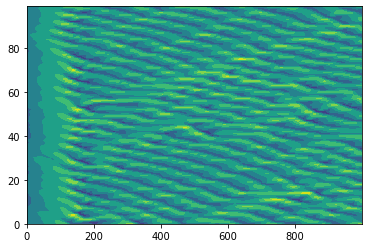

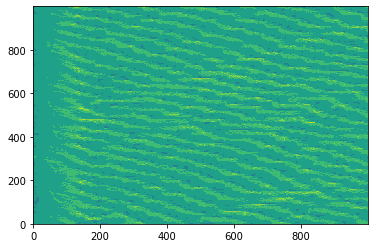

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.contourf(x_record.T)
plt.figure()
plt.contourf(y_record.T)

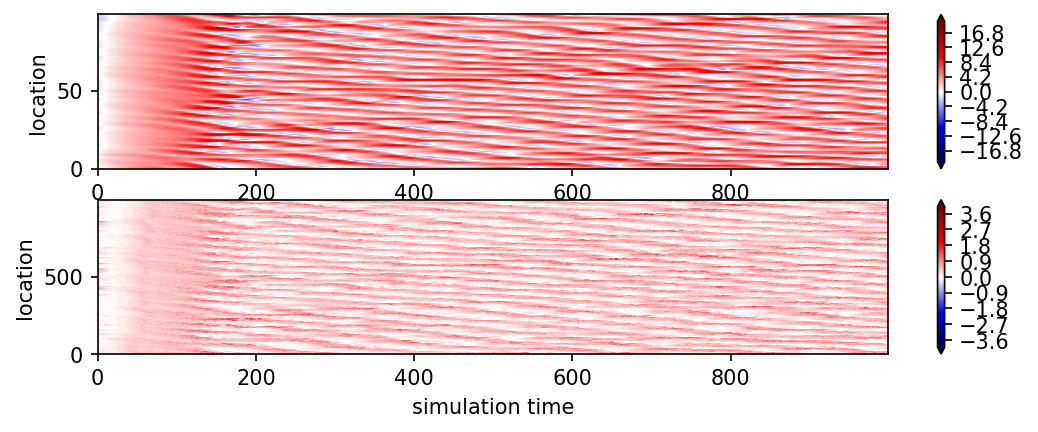

In [59]:
fig= plt.figure(figsize=(8.5, 3), dpi=150)
plt.subplot(2,1,1)
cs=plt.contourf(x_record.T,np.arange(-20,20.2,0.2),cmap='seismic',extend='both')
plt.xlabel('simulation time')
plt.ylabel('location')
plt.colorbar(cs)
plt.subplot(2,1,2)
cs=plt.contourf(y_record.T,np.arange(-4,4.1,0.1),cmap='seismic',extend='both')
plt.xlabel('simulation time')
plt.ylabel('location')
plt.colorbar(cs)
fig.savefig('/content/gdrive/MyDrive/website-hugo/chaos_and_predictability/week4/LR96_2scale.png', dpi=300, bbox_inches='tight')

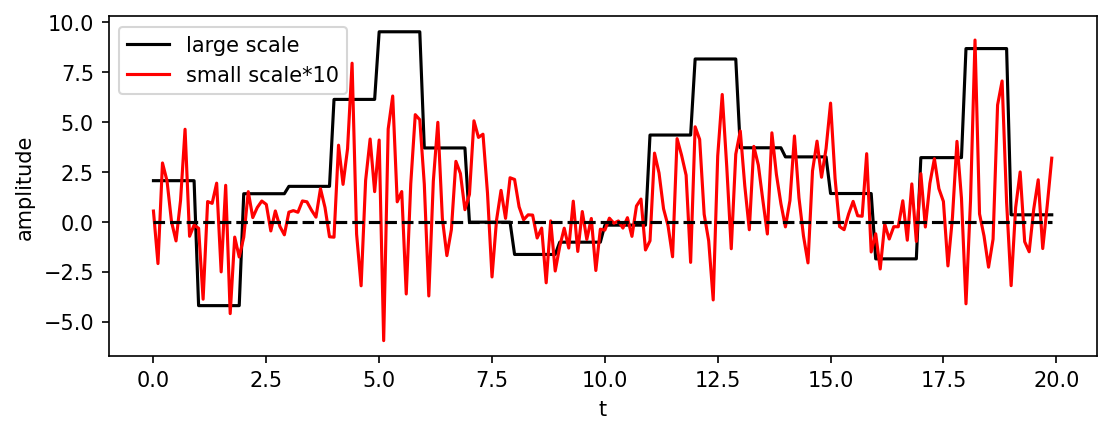

In [79]:
fig= plt.figure(figsize=(8.5, 3), dpi=150)
plt.plot(np.arange(0,20,0.1),np.repeat(x_record[300,0:20],10),'k', label='large scale')
plt.plot(np.arange(0,20,0.1),y_record[300,0:200]*10,'r', label='small scale*10')
plt.plot(np.arange(0,20,0.1),y_record[300,0:200]*0,'k--')
plt.legend()
plt.xlabel('t')
plt.ylabel('amplitude')
fig.savefig('/content/gdrive/MyDrive/website-hugo/chaos_and_predictability/week4/LR96_2scale_cross_section.png', dpi=300, bbox_inches='tight')

In [11]:
x_init    = x_record[300,:]
y_init    = y_record[300,:]
#x        = [1,2,3]
x_record_ens = np.zeros((50,300,np.size(x_init)))
y_record_ens = np.zeros((50,300,np.size(y_init)))
F            = np.eye(np.size(x_init))*8

for ens in range(50):
    print("working on ens="+str(ens))
    std     = 0.01
    num_samples = 100
    samples = np.random.normal(mean, std, size=num_samples)
    x       = x_init+samples
    std     = 0.01
    num_samples = 1000
    samples = np.random.normal(mean, std, size=num_samples)
    y       = y_init+samples
    count   = 0
    for t in range(2999):
        x_n2  = np.roll(x,2)
        x_n1  = np.roll(x,1)
        x_p1  = np.roll(x,-1)

        y_p2  = np.roll(y,-2)
        y_n1  = np.roll(y,1)
        y_p1  = np.roll(y,-1)
    
        dxdt  = -np.matmul(np.diag(x_n2),np.diag(x_n1))+np.matmul(np.diag(x_n1),np.diag(x_p1))-np.diag(x)-(h*c/b)*np.diag(np.sum(y.reshape(-1, 10), axis=1))+np.diag(F)
        dydt  = -c*b*np.matmul(np.diag(y_p2),np.diag(y_p1))+c*b*np.matmul(np.diag(y_n1),np.diag(y_p1))-c*np.diag(y)+h*c/b*np.diag(np.repeat(x,10))
        y     = (np.diag(y)+dydt*0.001).diagonal()
        x     = (np.diag(x)+dxdt*0.001).diagonal()
        if t % 10 ==0:
            x_record_ens[ens,count,:] = x
            y_record_ens[ens,count,:] = y
            count=count+1
np.savez('/content/gdrive/MyDrive/website-hugo/chaos_and_predictability/week4/L96_2scale_ens.npz',\
          x_record_ens = x_record_ens,\
          y_record_ens = y_record_ens,\
          )

working on ens=0
working on ens=1
working on ens=2
working on ens=3
working on ens=4
working on ens=5
working on ens=6
working on ens=7
working on ens=8
working on ens=9
working on ens=10
working on ens=11
working on ens=12
working on ens=13
working on ens=14
working on ens=15
working on ens=16
working on ens=17
working on ens=18
working on ens=19
working on ens=20
working on ens=21
working on ens=22
working on ens=23
working on ens=24
working on ens=25
working on ens=26
working on ens=27
working on ens=28
working on ens=29
working on ens=30
working on ens=31
working on ens=32
working on ens=33
working on ens=34
working on ens=35
working on ens=36
working on ens=37
working on ens=38
working on ens=39
working on ens=40
working on ens=41
working on ens=42
working on ens=43
working on ens=44
working on ens=45
working on ens=46
working on ens=47
working on ens=48
working on ens=49


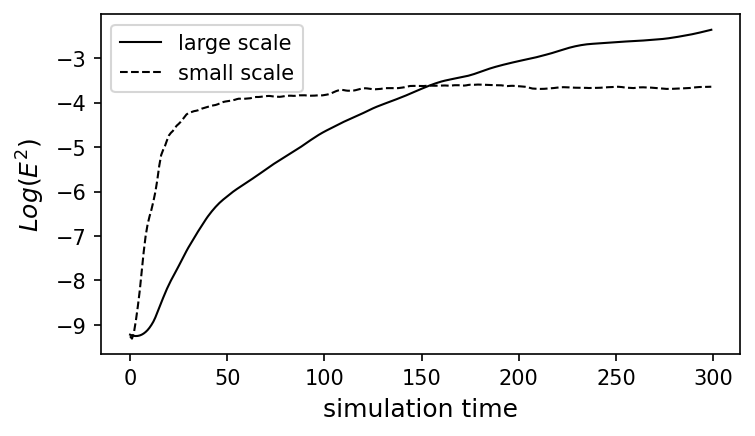

In [20]:
from sys import last_traceback
fig= plt.figure(figsize=(5.5, 3), dpi=150)
plt.plot(np.log(np.var(x_record_ens,axis=0).mean(axis=1)),'k',linewidth=1,label='large scale')
plt.xlabel('simulation time',fontsize=12)
plt.ylabel(r'$Log (E^2)$',fontsize=12)

plt.plot(np.log(np.var(y_record_ens,axis=0).mean(axis=1)),'k--',linewidth=1,label='small scale')
plt.xlabel('simulation time',fontsize=12)
plt.ylabel(r'$Log (E^2)$',fontsize=12)
plt.legend()
fig.savefig('/content/gdrive/MyDrive/website-hugo/chaos_and_predictability/week4/LR96_2scale_error.png', dpi=300, bbox_inches='tight')

In [91]:
def LR96_2scale(x_init, y_init ,x_std, y_std, tint, output_fequency,h,c,b, task_id):
    std         = x_std
    num_samples = np.size(x_init)
    samples     = np.random.normal(mean, std, size=num_samples)
    x           = x_init+samples
    std         = y_std
    num_samples = np.size(y_init)
    samples     = np.random.normal(mean, std, size=num_samples)
    y           = y_init+samples
    count       = 0
    x_record2   = np.zeros((int(tint/output_fequency),np.size(x_init)))
    y_record2   = np.zeros((int(tint/output_fequency),np.size(y_init)))
    for t in range(tint-1):
        x_n2  = np.roll(x,2)
        x_n1  = np.roll(x,1)
        x_p1  = np.roll(x,-1)

        y_p2  = np.roll(y,-2)
        y_n1  = np.roll(y,1)
        y_p1  = np.roll(y,-1)
    
        dxdt  = -np.matmul(np.diag(x_n2),np.diag(x_n1))+np.matmul(np.diag(x_n1),np.diag(x_p1))-np.diag(x)-(h*c/b)*np.diag(np.sum(y.reshape(-1, 10), axis=1))+np.diag(F)
        dydt  = -c*b*np.matmul(np.diag(y_p2),np.diag(y_p1))+c*b*np.matmul(np.diag(y_n1),np.diag(y_p1))-c*np.diag(y)+h*c/b*np.diag(np.repeat(x,10))
        y     = (np.diag(y)+dydt*0.001).diagonal()
        x     = (np.diag(x)+dxdt*0.001).diagonal()
        if t % output_fequency ==0:
            x_record2[count,:] = x
            y_record2[count,:] = y
            count=count+1
    return x_record2, y_record2, task_id

In [92]:
x_init    = x_record[300,:]
y_init    = y_record[300,:]
x_std     = 0.01
y_std     = 0.01
tint      = 3000
output_fequency = 10
h         = 1
c         = 10
b         = 10
task_id   = 1
x_record2, y_record2, task_id2 = LR96_2scale(x_init,y_init,x_std,y_std,tint,output_fequency,h,c,b,task_id)



In [98]:
import multiprocessing as mp
# make computation paralle
pool    = mp.Pool(mp.cpu_count())
results = []
def log_result(x):
    results.append(x)
#ar_detect_basic(ivt, ivtu ,ivtv, task_id)
for task_id in np.arange(2):
    pool.apply_async(LR96_2scale, args=(x_init,y_init,x_std,y_std,tint,output_fequency,h,c,b,task_id), callback = log_result)
# Close the pool for new tasks
pool.close()
# Wait for all tasks to complete at this point
pool.join()

#zipped_lists        = zip(list(np.array(results)[:,1]),list(np.array(results)[:,0]))
#sorted_zipped_lists = sorted(zipped_lists)

Process ForkPoolWorker-4:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "<ipython-input-91-654b2cd3c286>", line 23, in LR96_2scale
    dydt  = -c*b*np.matmul(np.diag(y_p2),np.diag(y_p1))+c*b*np.matmul(np.diag(y_n1),np.diag(y_p1))-c*np.diag(y)+h*c/b*np.diag(np.repeat(x,10))
Process ForkPoolWorker-3:
KeyboardInterrupt
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)


KeyboardInterrupt: ignored

  File "/usr/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "<ipython-input-91-654b2cd3c286>", line 23, in LR96_2scale
    dydt  = -c*b*np.matmul(np.diag(y_p2),np.diag(y_p1))+c*b*np.matmul(np.diag(y_n1),np.diag(y_p1))-c*np.diag(y)+h*c/b*np.diag(np.repeat(x,10))
KeyboardInterrupt
